# Lecture 4: Supervised Learning (Classification) with Wine Dataset
## Learning Outcomes
By the end of this lecture, you will:
- Understand and apply classification techniques to the Wine dataset.
- Explore Support Vector Machines (SVM), decision trees, and ensemble methods.
- Evaluate and compare model performance using classification metrics.
- Gain hands-on experience in preprocessing, training, and testing classification models.

---

## Objectives
In this lecture, we aim to:
1. **Understand the Dataset:**
   - Explore the structure and features of the Wine dataset.
   - Identify features for classification and target labels.

2. **Train Classification Models:**
   - Train a Support Vector Machine (SVM) for classification.
   - Build a decision tree model for classification.
   - Use ensemble methods such as Random Forest and Gradient Boosting.

3. **Evaluate Performance:**
   - Compare model performance using metrics such as accuracy, precision, recall, and F1-score.
   - Understand the confusion matrix and ROC-AUC curve.

4. **Optimize Models:**
   - Apply hyperparameter tuning to improve model performance.
   - Discuss when to use specific models and why.

---

## Guiding Questions
### Classification Models
- **What will we classify?**
  - We aim to classify the type of wine (e.g., Class 0, Class 1, Class 2) based on its chemical properties.
  
- **What features will we use?**
  - Analyze and select features such as `alcohol`, `malic acid`, `ash`, etc., for the classification task.

- **How will we evaluate our models?**
  - We will use evaluation metrics like accuracy, precision, recall, F1-score, and ROC-AUC.

---

### Support Vector Machines (SVM)
- **What is an SVM, and how does it classify?**
  - Understand the concept of hyperplanes and support vectors in classification tasks.

- **What kernel will we use?**
  - Experiment with different kernels like linear, polynomial, and RBF (Radial Basis Function).

---

### Decision Trees
- **How does a decision tree classify data?**
  - Visualize the decision-making process based on feature splits.

- **How do we control overfitting in decision trees?**
  - Understand the role of parameters like `max_depth`, `min_samples_split`, and `min_samples_leaf`.

---

### Ensemble Methods
- **Why use ensemble methods?**
  - Learn the benefits of combining multiple decision trees for robust classification.

- **What methods will we explore?**
  - Apply Random Forest and Gradient Boosting to the classification task.

---

### General Questions
- **What insights can we derive from model performance?**
  - Compare the models and interpret their strengths and weaknesses.

- **How can we improve model accuracy?**
  - Discuss hyperparameter tuning and advanced techniques.

---


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
# Load the Wine dataset from sklearn
from sklearn.datasets import load_wine

# Load the data and convert to a Pandas DataFrame
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Display the first few rows of the dataset
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
# Explore the dataset structure
df.info()
df.describe()


In [8]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


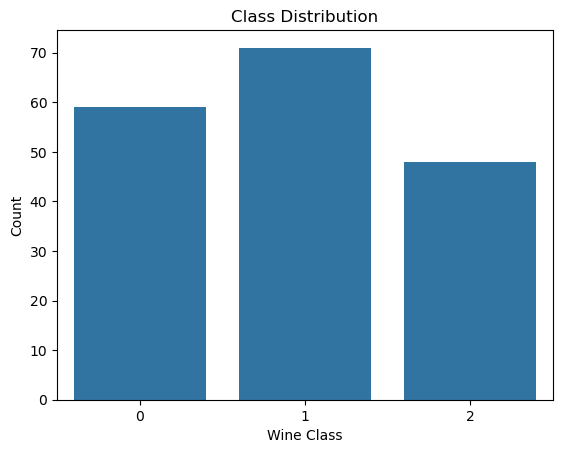

In [10]:
# Plot class distribution
sns.countplot(x='target', data=df)
plt.title("Class Distribution")
plt.xlabel("Wine Class")
plt.ylabel("Count")
plt.show()


In [12]:
# Separate features and target variable
X = df.drop(columns=['target'])
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
X_train

In [ ]:
y_test

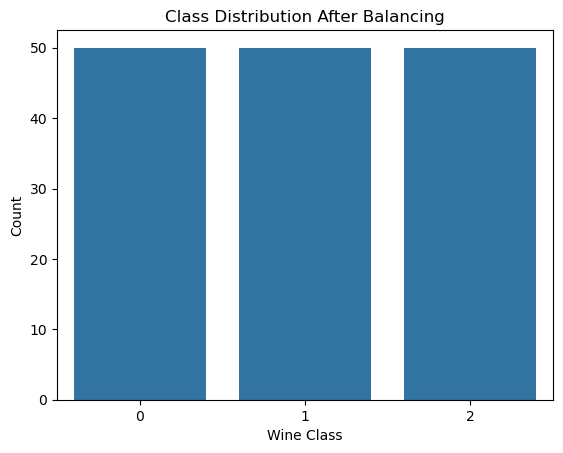

In [14]:
# Import SMOTE for class balancing
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the distribution of classes after balancing
sns.countplot(x=y_train_balanced)
plt.title("Class Distribution After Balancing")
plt.xlabel("Wine Class")
plt.ylabel("Count")
plt.show()


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Train Logistic Regression model on balanced data
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log_reg))
print("Accuracy Score (Logistic Regression):", accuracy_score(y_test, y_pred_log_reg))


Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.95      0.95      0.95        21
           2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54

Accuracy Score (Logistic Regression): 0.9629629629629629


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


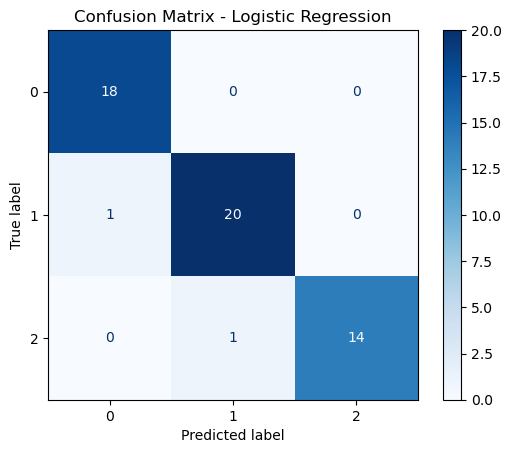

In [18]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


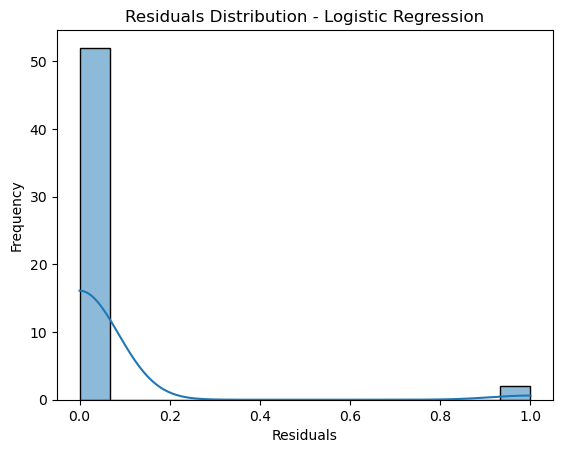

In [20]:
# Residuals for Logistic Regression
residuals_log_reg = y_test - y_pred_log_reg

# Plot residuals
sns.histplot(residuals_log_reg, kde=True, bins=15)
plt.title("Residuals Distribution - Logistic Regression")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


### Confusion Matrix - Logistic Regression
The confusion matrix provides a detailed breakdown of the classification results:
- **True Label 0**: 18 instances correctly classified as 0, no misclassifications.
- **True Label 1**: 20 instances correctly classified as 1, with 1 instance misclassified as 0.
- **True Label 2**: 14 instances correctly classified as 2, with 1 instance misclassified as 1.

This shows a generally good classification performance but with a few misclassifications, particularly between classes 1 and 2.

---

### Residuals Distribution - Logistic Regression
Residuals represent the difference between the predicted probabilities and the actual class labels:
- The histogram shows that most residuals are close to zero, indicating that the model's predictions are generally accurate.
- A small number of residuals are higher, representing misclassified instances or less confident predictions.

The residual distribution suggests that the logistic regression model is reasonably effective for this classification task, but there is room for improvement, especially in reducing the residuals for certain predictions.


In [22]:
from sklearn.svm import SVC

# Train an SVM model on balanced data
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))
print("Accuracy Score (SVM):", accuracy_score(y_test, y_pred_svm))


Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.91      0.95      0.93        21
           2       1.00      0.87      0.93        15

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54

Accuracy Score (SVM): 0.9444444444444444


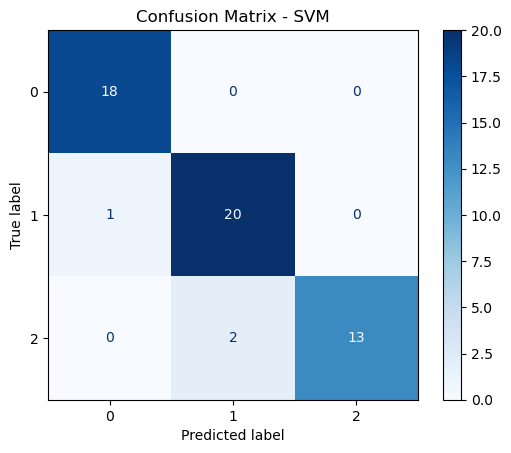

In [24]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - SVM")
plt.show()


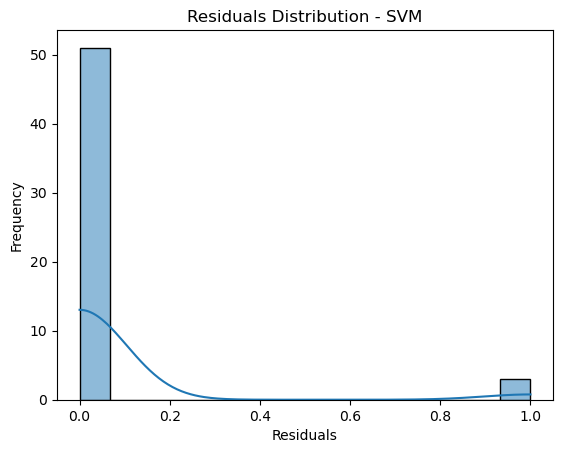

In [26]:
# Residuals for SVM
residuals_svm = y_test - y_pred_svm

# Plot residuals
sns.histplot(residuals_svm, kde=True, bins=15)
plt.title("Residuals Distribution - SVM")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [ ]:
##try with scatter plot using residuals.

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree model on balanced data
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))
print("Accuracy Score (Decision Tree):", accuracy_score(y_test, y_pred_dt))


Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.90      0.86      0.88        21
           2       0.83      1.00      0.91        15

    accuracy                           0.91        54
   macro avg       0.91      0.92      0.91        54
weighted avg       0.91      0.91      0.91        54

Accuracy Score (Decision Tree): 0.9074074074074074


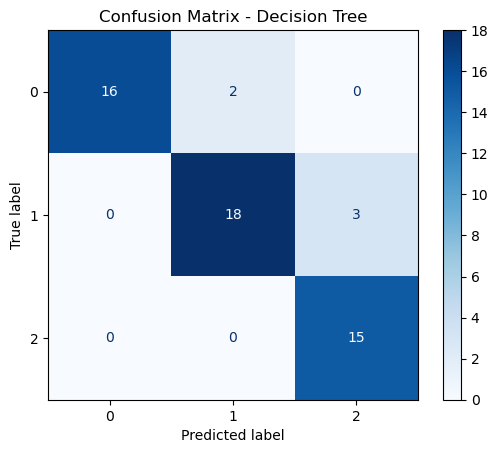

In [30]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree")
plt.show()


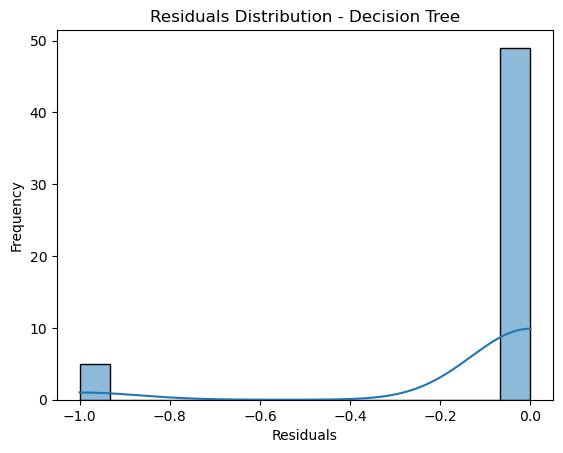

In [32]:
# Residuals for Decision Tree
residuals_dt = y_test - y_pred_dt

# Plot residuals
sns.histplot(residuals_dt, kde=True, bins=15)
plt.title("Residuals Distribution - Decision Tree")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model on balanced data
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score (Random Forest):", accuracy_score(y_test, y_pred_rf))


In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [ ]:
# Residuals for Random Forest
residuals_rf = y_test - y_pred_rf

# Plot residuals
sns.histplot(residuals_rf, kde=True, bins=15)
plt.title("Residuals Distribution - Random Forest")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting model on balanced data
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Classification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb))
print("Accuracy Score (Gradient Boosting):", accuracy_score(y_test, y_pred_gb))


In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


In [ ]:
# Residuals for Gradient Boosting
residuals_gb = y_test - y_pred_gb

# Plot residuals
sns.histplot(residuals_gb, kde=True, bins=15)
plt.title("Residuals Distribution - Gradient Boosting")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Collect model performance
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracy_scores = [
    accuracy_score(y_test, y_pred_log_reg),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_gb)
]

# Plot accuracy comparison
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=15)
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the labels for multi-class AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y))  # Adjust to match the number of classes
n_classes = y_test_binarized.shape[1]

# Dictionary to store models and their predicted probabilities
models = {
    "Logistic Regression": log_reg_model.predict_proba(X_test),
    "Random Forest": rf_model.predict_proba(X_test),
    "Gradient Boosting": gb_model.predict_proba(X_test),
}

# Initialize a plot
plt.figure(figsize=(12, 8))

# Loop through each model
for model_name, probabilities in models.items():
    for i in range(n_classes):
        # Compute ROC curve and AUC for each class
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} - Class {i} (AUC = {roc_auc:.2f})')

# Random chance line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Random Chance (AUC = 0.50)")

# Add plot details
plt.title("AUC-ROC Curves for All Models", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=8)
plt.grid(True)
plt.show()


#### Key Points:
1. **Axes**:
   - The **X-axis** represents the False Positive Rate (FPR).
   - The **Y-axis** represents the True Positive Rate (TPR).

2. **Diagonal Line (Random Chance)**:
   - The black dashed line represents random guessing with an **AUC = 0.50**.
   - Any curve above this line indicates better-than-random performance.

3. **Performance of Models**:
   - **Logistic Regression**:
     - Achieved nearly perfect performance for Classes 0 and 2 with an **AUC = 1.00**.
     - Slightly lower performance for Class 1 with an **AUC = 0.99**, indicating it struggled slightly more with this class.
   - **Random Forest**:
     - Perfect classification for all three classes with **AUC = 1.00**.
     - This suggests the model captures the patterns in the dataset very well.
   - **Gradient Boosting**:
     - Also achieved perfect classification for all three classes with **AUC = 1.00**.
     - This result highlights the power of ensemble methods in handling complex classification tasks.

4. **Significance of AUC**:
   - AUC measures the ability of a model to distinguish between classes. 
   - Values close to 1.0 indicate excellent performance, while values near 0.5 suggest poor performance.

#### Observations:
- **Logistic Regression**:
  - Though slightly less accurate than the other models, it still achieved remarkable performance.
- **Random Forest and Gradient Boosting**:
  - Both ensemble methods outperformed Logistic Regression in consistency, achieving perfect AUC for all classes.
  - This indicates that these models may be better suited for this dataset, likely due to their ability to capture non-linear patterns.
